# **Hypothesis testing**

In [1]:
# see the output of multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import the required libraries
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm
from scipy.stats import t


In [3]:
# Function to calculate the mean and standard deviation 
import math
def get_mean(values):
    return sum(values)*1.0/len(values)

def get_std(values):
    length=len(values)
    m=get_mean(values)
    total_sum=0
    for i in range(length):
        total_sum+=(values[i]-m)**2
        under_root=total_sum*1.0/(length-1)
    return math.sqrt(under_root)
#or use this to calculate standard deviation using statistics module directly 
#import statistics
#statistics.stdev([list of values])

In [4]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

#### UnKnown Variance of Population

### Step-1: Set the Hypothesis

Alternate Hypothesis (Bold claim):$$ H_1: \mu \neq 500 \ i.e, \ Average\  weight\ of\ each\ packet\ doesnot\ contain\ 500gms\ of\ Biryani\ $$
Null Hypothesis (Status Quo):$$ H_0:  \mu = 500  \ i.e, \ Average\  weight\ of\ each\ packet\ does\ contains\ 500gms\ of\ Biryani\$$

### Step-2: Compute the mean and standard deviation of the given sample


Collect a sample of size n = 10$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$

In [5]:
x=[490,220,470,500,495,496,496,498,508,480]
sample_mean=get_mean(x)
sample_std=get_std(x)
print('sample_mean   :',sample_mean)
print('sample_std(s) :',round(sample_std,4))

sample_mean   : 465.3
sample_std(s) : 86.8486


### Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


In [6]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std =86.8486

In [7]:
# Calculating the t-score
t_cal= t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_cal)

-1.2634749991115888


### Step-4: Decide $ \alpha $ or significance level

In [8]:
# Two tail

alpha = 1 - 0.95  # With 95% confidence or 5% level of significance

#For sample size n=10 => Degrees of freedom=10-1=> 9

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


### Step-5:Apply Decision rule
 5.1 two-tailed t-test: $$ reject \ H_0 \ or \ H_1 \ ? $$

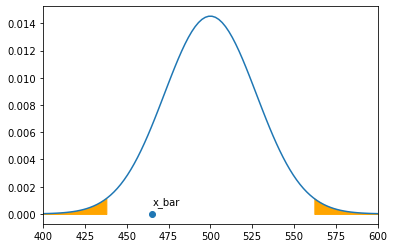

In [9]:
# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007));

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [10]:
### Conclusion using t test

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


### Step - 5.2: Compute p-value

In [11]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t_cal)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641852588997756
Fail to reject Null Hypothesis


### Conclusion:
        𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑤𝑒𝑖𝑔ℎ𝑡 𝑜𝑓 𝑒𝑎𝑐ℎ 𝑝𝑎𝑐𝑘𝑒𝑡 𝑑𝑜𝑒𝑠 𝑐𝑜𝑛𝑡𝑎𝑖𝑛𝑠 500𝑔𝑚𝑠 𝑜𝑓 𝐵𝑖𝑟𝑦𝑎𝑛𝑖
---

### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

#### UnKnown Variance of Population

### Step-1: Set the Hypothesis

Alternate Hypothesis (Bold claim):$$ H_1: \mu > 4 \ \ i.e, \ Average \ rating \ is \ greater \ than \ 4\ $$
Null Hypothesis (Status Quo):$$ H_0:  \mu \leq 4 \ i.e, \ \ Average\  rating \ is\ not\ greater\ than\ to \ 4 \$$

### Step-2: Compute the mean and standard deviation of the given sample


Collect a sample of size n = 20 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$

In [12]:
l=[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] 
sample_mean= get_mean(l)
sample_std= get_std(l)
print('sample_mean   :',sample_mean)
print('sample_std(s) :',round(sample_std,4))

sample_mean   : 4.25
sample_std(s) : 0.8507


### Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$



In [13]:
# Defining the sample and population parameters

sample_size = len(l)
sample_mean = 4.25
pop_mean = 4
sample_std =0.8507

In [14]:
# Calculating the t-score
t_cal=t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_cal)

1.3142517794168271


### Step-4: Decide $ \alpha $ or significance level

In [15]:
# Two tail
confidence_level = 0.95 # with 95% confidence

alpha = 1 - confidence_level # With 95% confidence or 5% level of significance

#For sample size n=20 => Degrees of freedom=20-1=> 19
t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


### Step-5:Apply Decision rule
 5.1 two-tailed t-test: $$ reject \ H_0 \ or \ H_1 \ ? $$

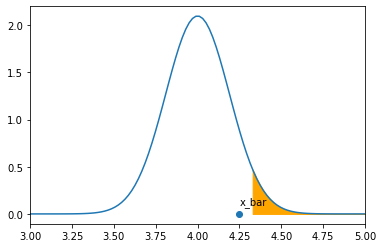

In [16]:
# Defining the x minimum and x maximum
x_min = 3
x_max = 5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values (One tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.10));

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [17]:
# Conclusion using t test

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


#### 5.2 P-test

In [18]:
# Conclusion using p test

p_value = (1.0 - norm.cdf(np.abs(t_cal)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09438074436411092
Fail to reject Null Hypothesis


### Conclusion:
        𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑟𝑎𝑡𝑖𝑛𝑔 𝑖𝑠 not greater than  4
---

### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? 

#### UnKnown Variance of Population

### Step-1: Set the Hypothesis

Alternate Hypothesis (Bold claim):$$ H_1: \mu > 15\ \ i.e, \ Average \ SUV's \ milage\ of \ fuel \ management \ system \ of \ is \ Greater\ than \ 15 \ km/litre \  $$

Null Hypothesis (Status Quo):$$ H_0:  \mu \leq  15 \ i.e, \ Average \ SUV's \ milage\ of \ fuel \ management \ system \ of \ is\ not\ greater\ than\ \ 15 \ km/litre \ $$

### Step-2: Compute the mean and standard deviation of the given sample    <!---       ---->
sample = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] <!---       ---->of
size 20


In [19]:
m=[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] 
sample_mean=get_mean(m)
sample_std=get_std(m)
print('sample_mean   :',round(sample_mean,4))
print('sample_std(s) :',round(sample_std,4))

sample_mean   : 15.099
sample_std(s) : 1.0254


### Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$



In [20]:
# Defining the sample and population parameters

sample_size = len(m)
sample_mean = 15.099
pop_mean = 15
sample_std = 1.0254

In [21]:
# Calculating the t-score
t_cal=t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_cal)

0.4317743900379942


### Step-4: Decide the level of significance

In [22]:
# One tail
confidence_level = 0.95 # with 95% confidence

alpha = 1 - confidence_level # With 95% confidence or 5% level of significance

#For sample size n=100 => Degrees of freedom=20-1=> 19
t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


### Step-5:Apply Decision rule
 5.1 two-tailed t-test: $$ reject \ H_0 \ or \ H_1 \ ? $$

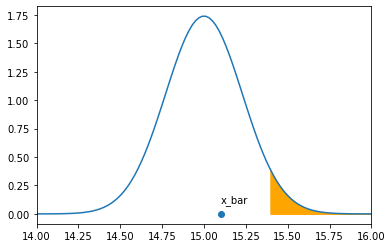

In [23]:
# Defining the x minimum and x maximum
x_min = 14
x_max = 16


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values (One tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.10));

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis



In [24]:
# Conclusion using t test

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


#### 5.2 P-test

In [25]:

# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_cal))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33295269728673693
Fail to reject Null Hypothesis


### Conclusion:
        𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑆𝑈𝑉′𝑠 𝑚𝑖𝑙𝑎𝑔𝑒 𝑜𝑓 𝑓𝑢𝑒𝑙 𝑚𝑎𝑛𝑎𝑔𝑒𝑚𝑒𝑛𝑡 𝑠𝑦𝑠𝑡𝑒𝑚 𝑜𝑓 𝑖𝑠 not greater than 15 𝑘𝑚/𝑙𝑖𝑡𝑟𝑒 
---

### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? 

#### UnKnown Variance of Population

### Step-1: Set the Hypothesis

Alternate Hypothesis (Bold claim):$$ H_1: \mu < 100\ \ i.e, \ Average \ time\ to\ predict\ any\ future\ datapoint\ is\ less\ than\ 100ms\  $$
Null Hypothesis (Status Quo):$$ H_0:  \mu \geq 100 \ i.e,  \ Average \ time\ to\ predict\ any\ future\ datapoint\ is\ not\ less\ than\ 100ms\  $$

### Step-2: Compute the mean and standard deviation of the given sample

Collect the sample of n=25

In [26]:
random=42
n=list(np.random.uniform(98,101,25))

In [27]:
# Defining the sample and population parameters
sample_size=25
pop_mean=100

sample_mean=get_mean(n)
sample_std=get_std(n)

# printing the sample mean and std
print('sample_mean   :',round(sample_mean,4))
print('sample_std(s) :',round(sample_std,4))

sample_mean   : 99.6709
sample_std(s) : 1.0719


### Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

In [28]:
# Calculating the t-score
t_cal=t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_cal)

-1.5353366681512592


### Step-4: Decide $ \alpha $ or significance level


In [29]:
# One tail
confidence_level = 0.99 # with 99% confidence

alpha = 1 - confidence_level # With 99% confidence or 1% level of significance

#For sample size n=25 => Degrees of freedom=25-1=> 24
t_critical = t.ppf(1-alpha, df = 24)

print(t_critical)

2.4921594731575762


### Step-5:Apply Decision rule
 5.1 two-tailed t-test: $$ reject \ H_0 \ or \ H_1 \ ? $$

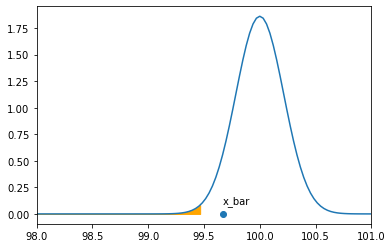

In [30]:
# Defining the x minimum and x maximum
x_min =98
x_max = 101

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.10));

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis



In [31]:
# Conclusion using t test

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [32]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_cal))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.06235057576599834
Fail to reject Null Hypothesis


### Conclusion:
     𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑡𝑖𝑚𝑒 𝑡𝑜 𝑝𝑟𝑒𝑑𝑖𝑐𝑡 𝑎𝑛𝑦 𝑓𝑢𝑡𝑢𝑟𝑒 𝑑𝑎𝑡𝑎𝑝𝑜𝑖𝑛𝑡 𝑖𝑠 not 𝑙𝑒𝑠𝑠 𝑡ℎ𝑎𝑛 100𝑚𝑠 
---

### We can also calculate mean and standard deviation using statistics module 

In [4]:
import statistics
statistics.stdev([1,2,3,4,5,6,7,100])

34.0

In [7]:
statistics.mean([1,2,3,4,5,6,7,100])


16